In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [20]:
data=pd.read_excel('D:\M\MATLAB Driver\\forward\\twenty\\NEW+700\上一次编写数据 - 副本.xls')
data

,空气温度,空气湿度,CO2,H2S,NH3P,NH3
0,27.100000,68.300000,1295.000000,0.520000,6.0500,6.3400
1,26.900000,68.500000,1255.000000,0.652867,6.3400,6.6300
2,26.500000,69.600000,1213.000000,0.766133,6.6300,6.4700
3,25.900000,71.200000,1160.000000,0.704000,6.4700,6.4700
4,26.100000,71.800000,1298.000000,0.714800,6.4700,9.7200
...,...,...,...,...,...,...
995,27.446330,80.320755,1039.000000,0.665267,6.3877,6.9045
996,28.073973,80.508514,1070.919008,0.861833,6.9045,6.2715
997,28.740496,78.972102,1023.762584,0.649433,6.2715,6.6837
998,29.558275,79.886758,1083.869414,0.763233,6.6837,6.7500


In [40]:
#相关系数矩阵
corr = data.corr()
corr

,空气温度,空气湿度,CO2,H2S,NH3P,NH3
空气温度,1.000000,-0.084281,-0.112143,-0.031717,0.012292,0.015599
空气湿度,-0.084281,1.000000,0.136009,0.242648,0.283745,0.270984
CO2,-0.112143,0.136009,1.000000,0.261340,0.225500,0.222512
H2S,-0.031717,0.242648,0.261340,1.000000,0.810473,0.640773
NH3P,0.012292,0.283745,0.225500,0.810473,1.000000,0.902358
NH3,0.015599,0.270984,0.222512,0.640773,0.902358,1.000000


In [6]:
print('温度范围')
print(data['空气温度'].min())
print(data['空气温度'].max())
print('湿度范围')
print(data['空气湿度'].min())
print(data['空气湿度'].max())
print('co2范围')
print(data['CO2'].min())
print(data['CO2'].max())
print('硫化氢范围')
print(data['H2S'].min())
print(data['H2S'].max())

温度范围
24.5
32.655
湿度范围
67.8
88.5751
co2范围
982.0600999999999
1424.0
硫化氢范围
0.5
3.40663333333333


# 数据编制

In [151]:
data=pd.read_excel('D:\M\MATLAB Driver\\forward\\twenty\\NEW+700\\new_data_2.xlsx',sheet_name='Sheet2')
#将data['NH3']的值映射到12.5到25之间
data['NH3'] = (data['NH3']-data['NH3'].min())/(data['NH3'].max()-data['NH3'].min())*(15-5)+5


## H2S

In [152]:
#根据NH3所在列生成一列相关系数为0.75左右的新列
data['NH3_H2S'] = 0.45*data['NH3']+np.sqrt(1-0.45**2)*np.random.randn(960)
#将data['NH3_H2S']的值映射到2到5之间
data['NH3_H2S'] = (data['NH3_H2S']-data['NH3_H2S'].min())/(data['NH3_H2S'].max()-data['NH3_H2S'].min())*(5-2)+2


In [149]:
data.corr('spearman')[('NH3')]

T          0.651768
H          0.768116
CO2        0.756668
H2S        0.845710
NH3P       0.681420
NH3        1.000000
EPSILON   -0.031475
NH3_H2S    0.766910
Name: NH3, dtype: float64

# 空气湿度

In [78]:
data['NH3_hunmidity'] = 0.41*data['NH3']+np.sqrt(1-0.41**2)*np.random.randn(960)
#映射到67.8到88.5751之间
data['NH3_hunmidity'] = (data['NH3_hunmidity']-data['NH3_hunmidity'].min())/(data['NH3_hunmidity'].max()-data['NH3_hunmidity'].min())*(88.5751-67.8)+67.8

In [79]:
data.corr('spearman')[('NH3')]

NH3P             0.681642
NH3              1.000000
NH3_H2S          0.839971
NH3_hunmidity    0.768116
Name: NH3, dtype: float64

# CO2

In [80]:
data['NH3_CO2'] = 0.38*data['NH3']+np.sqrt(1-0.38**2)*np.random.randn(960)
#映射到982.06到1424.5之间
data['NH3_CO2'] = (data['NH3_CO2']-data['NH3_CO2'].min())/(data['NH3_CO2'].max()-data['NH3_CO2'].min())*(1424.5-982.06)+982.06


In [81]:
data.corr('spearman')[('NH3')]

NH3P             0.681642
NH3              1.000000
NH3_H2S          0.839971
NH3_hunmidity    0.768116
NH3_CO2          0.756668
Name: NH3, dtype: float64

# 空气温度

In [82]:
data['NH3_temperature'] = 0.3*data['NH3']+np.sqrt(1-0.3**2)*np.random.randn(960)
#映射到20.5到30之间
data['NH3_temperature'] = (data['NH3_temperature']-data['NH3_temperature'].min())/(data['NH3_temperature'].max()-data['NH3_temperature'].min())*(30-20.5)+20.5

In [85]:
data.corr('spearman')[('NH3')]

NH3P               0.681642
NH3                1.000000
NH3_H2S            0.839971
NH3_hunmidity      0.768116
NH3_CO2            0.756668
NH3_temperature    0.651767
Name: NH3, dtype: float64

In [95]:
new_data = data[['NH3','NH3P','NH3_H2S','NH3_hunmidity','NH3_CO2','NH3_temperature']]
new_data.corr('spearman')['NH3']

NH3                1.000000
NH3P               0.681642
NH3_H2S            0.845710
NH3_hunmidity      0.768116
NH3_CO2            0.756668
NH3_temperature    0.651767
Name: NH3, dtype: float64

In [96]:
new_data

,NH3,NH3P,NH3_H2S,NH3_hunmidity,NH3_CO2,NH3_temperature
0,10.933306,10.567480,2.855219,70.642775,1142.997747,22.492358
1,11.474624,10.933306,2.223162,73.274718,1082.079471,24.705860
2,11.175966,11.474624,2.420713,70.801028,1070.656392,25.130483
3,11.175966,11.175966,2.092581,71.921904,1148.768783,23.416340
4,17.080639,11.175966,3.194033,76.366687,1273.443750,24.931540
...,...,...,...,...,...,...
955,13.156941,17.677077,2.897340,74.000003,1155.337868,26.117742
956,14.830756,13.156941,3.024330,73.860623,1130.846451,22.808144
957,12.611848,14.830756,2.337939,73.602006,1084.788540,21.617478
958,11.549288,12.611848,2.758770,69.075731,1145.211359,22.343351


In [30]:
#更改列名
new_data.columns = ['NH3','NH3P','H2S','H','CO2','T']
new_data.to_excel('D:\M\MATLAB Driver\\forward\\twenty\\NEW+700\\new_data_2.xlsx',index=False)

In [97]:
#生成0-1之间的随机数，0占0.85，1占0.15
np.random.seed(0)
a = np.random.choice([0,1],1000,p=[0.85,0.15])
a

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

# 生成新的数据

T       0.650075
H       0.722463
CO2     0.661417
H2S     0.744465
NH3P    0.792738
NH3     1.000000
NH3C    1.000000
Name: NH3, dtype: float64


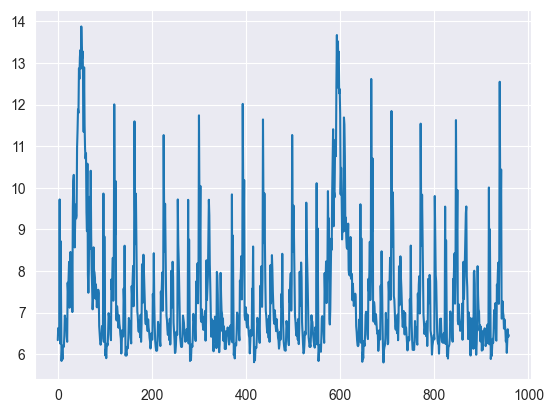

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data2=pd.read_excel('D:\M\MATLAB Driver\\forward\\twenty\\NEW+700\\new_data_2.xlsx',sheet_name='Sheet2')
data1=pd.read_excel('D:\M\MATLAB Driver\\forward\\twenty\\NEW+700\\new_data_2.xlsx',sheet_name='Sheet1')
print(data1.corr()['NH3'])
plt.plot(data1['NH3'])

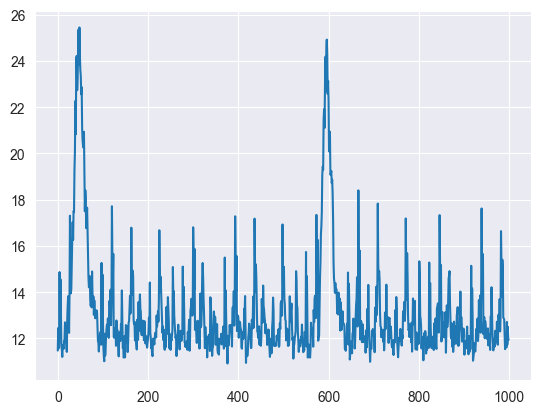

In [7]:
def f(row):
    return row+np.random.uniform(5,6)

data['NH3_NEW']=data['NH3'].apply(f)
plt.plot(data['NH3_NEW'])

mean = (8 + 20) / 2
std_dev = (20 - 8) / 6
modify_NH3 = np.random.normal(loc=mean, scale=std_dev, size=30)

# 将生成的数据限制在最小值和最大值之间
modify_NH3 = np.clip(modify_NH3, 8, 20)
plt.plot(modify_NH3)
print(modify_NH3)

In [34]:

#从8.5到20.5，每隔0.5区间生成5个随机数
anss=[]
t=np.linspace(8.5,20.5,25)
for i in t:
    x=[np.random.uniform(i,i+0.5) for j in range(1)]
    anss.extend(x)
    
#anss.reverse()
pd.DataFrame(anss)  

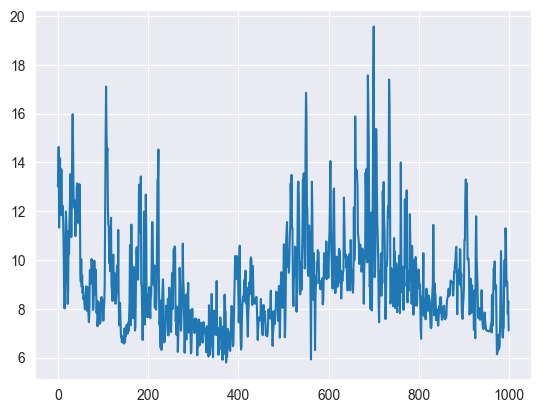

In [56]:
#将data['NH3']的值映射到5.8到19.57之间
data2['NH3'] = (data2['NH3']-data2['NH3'].min())/(data2['NH3'].max()-data2['NH3'].min())*(19.57-5.8)+5.8
plt.plot(data2['NH3'])

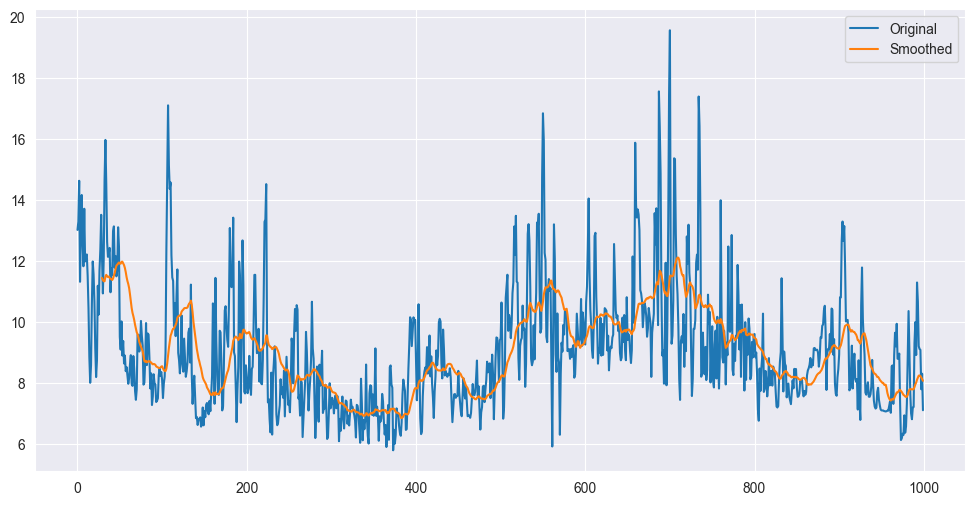

In [62]:
# 设置滑动窗口的大小
window_size = 30

# 使用滑动平均来平滑数据

data2['NH3_2_smooth'] = data2['NH3'].rolling(window=window_size).mean()

# 绘制原始数据和平滑后的数据
plt.figure(figsize=(12, 6))
plt.plot(data2['NH3'], label='Original')
plt.plot(data2['NH3_2_smooth'], label='Smoothed')
plt.legend()
plt.show()

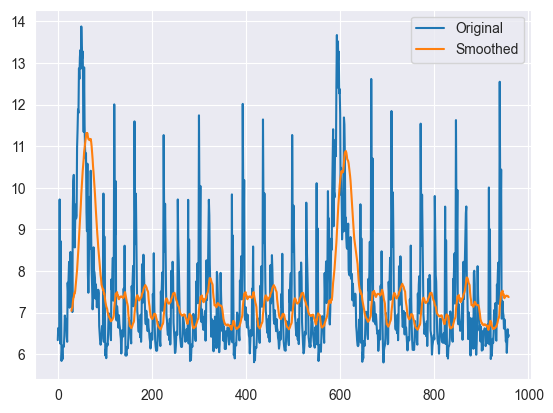

In [24]:
window_size = 30
data1['NH3_1_smooth'] = data1['NH3'].rolling(window=window_size).mean()

plt.plot(data1['NH3'],label='Original')
plt.plot(data1['NH3_1_smooth'],label='Smoothed')
plt.legend()




In [25]:
# 导入所需的库
import numpy as np

# 初始化一个空的列表来存储新的数据
new_data = []

# 遍历data['NH3']列
for i in range(len(data1['NH3']) - 1):
    # 将当前数值添加到新的数据列表中
    new_data.append(data1['NH3'].iloc[i])

    # 如果当前数值和下一个数值之差大于3
    if abs(data1['NH3'].iloc[i] - data1['NH3'].iloc[i+1]) > 1:
        # 生成四个在这两个数值之间的随机数
        random_numbers = np.random.uniform(min(data1['NH3'].iloc[i], data1['NH3'].iloc[i+1]),
                                           max(data1['NH3'].iloc[i], data1['NH3'].iloc[i+1]), 4)
        # 将生成的随机数插入到新的数据列表中的相应位置
        for j in range(4):
            new_data.insert(i+1+j, random_numbers[j])

# 将最后一个数值添加到新的数据列表中
new_data.append(data1['NH3'].iloc[-1])

# 将新的数据列表转换为pandas Series，并替换原来的data['NH3']列
data1['NH3'] = pd.Series(new_data)

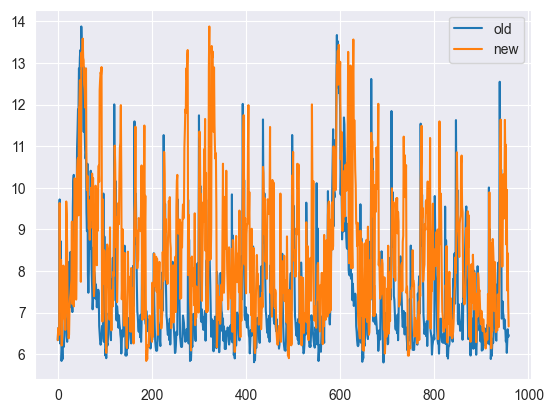

In [26]:
plt.plot(data1['NH3C'],label='old')
plt.plot(data1['NH3'],label='new')
plt.legend()

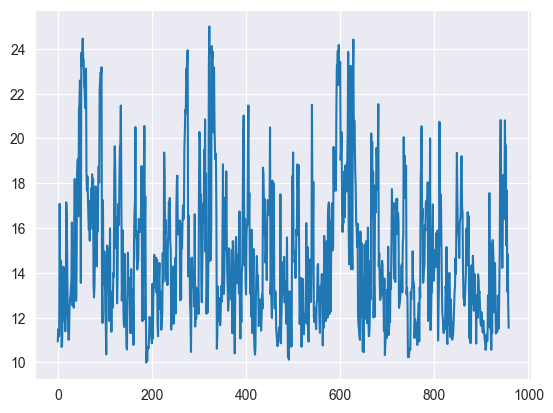

In [27]:
#将data['NH3']的值映射到10到25之间
data1['NH3'] = (data1['NH3']-data1['NH3'].min())/(data1['NH3'].max()-data1['NH3'].min())*(25-10)+10
plt.plot(data1['NH3'])

In [32]:
data1['NH3']

0      10.933306
1      11.474624
2      11.175966
3      11.175966
4      17.080639
         ...    
954    17.677077
955    13.156941
956    14.830756
957    12.611848
958    11.549288
Name: NH3, Length: 959, dtype: float64

In [137]:
dt=pd.read_excel('D:\M\MATLAB Driver\\forward\\twenty\\NEW+700\\new_data_2.xlsx',sheet_name='Sheet2')

In [135]:
dt.corr('spearman')['NH3']

T          0.651768
H          0.768116
CO2        0.756668
H2S        0.845710
NH3P       0.681420
NH3        1.000000
EPSILON   -0.031475
Name: NH3, dtype: float64

In [144]:
# 假设data1是您的DataFrame，包含了'NH3'和'NH3P'列

# 对X指数化，然后映射到10到25之间
X = data1['NH3']
#将X映射到12.5到25之间
X = (X-X.min())/(X.max()-X.min())*(25-12.5)+12.5

# Y取X第二个到最后一个元素
Y = X[1:]

# 将X最后一个值插入到Y的第一个位置
Y = np.insert(Y.values, 0, X.iloc[-1])

X=pd.DataFrame (X)
X['Y']=Y
X.corr()


,NH3,Y
NH3,1.00000,0.99998
Y,0.99998,1.00000


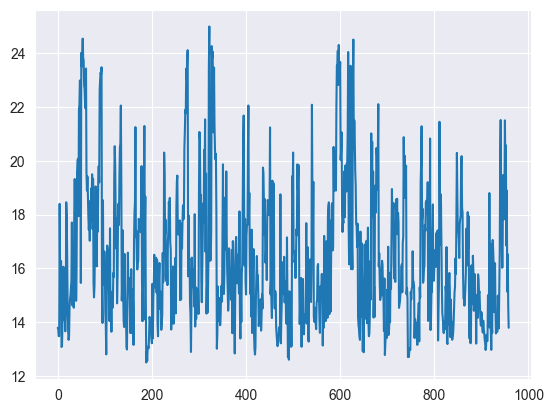

In [145]:
plt.plot(X['Y'])

In [155]:
x=np.random.uniform(12.5,25,1000)
#将x的值作为y的值，然后将x最后一个值插入到y的第一个位置
y=x
y = np.insert(y, 0, x[-1])
#删除y的最后一个值
y = y[:-1]
x=pd.DataFrame (x)
x['Y']=y
x.corr()


,0,Y
0,1.000000,-0.041823
Y,-0.041823,1.000000


In [156]:
x

,0,Y
0,22.693066,23.136082
1,12.691215,22.693066
2,19.629972,12.691215
3,20.230741,19.629972
4,24.848707,20.230741
...,...,...
995,23.668072,21.654565
996,22.393523,23.668072
997,13.348900,22.393523
998,15.586168,13.348900


In [175]:
data2=pd.read_excel('D:\M\MATLAB Driver\\forward\\twenty\\NEW+700\\new_data.xlsx',sheet_name='Sheet1')

In [207]:
dtt=pd.read_excel('D:\M\MATLAB Driver\\forward\\twenty\\NEW+700\\new2_data.xlsx')
x=data2.loc[500:,:]
x.corr()['NH3']

T       0.678543
H       0.767263
CO2     0.727611
H2S     0.772439
NH3P    0.889249
NH3     1.000000
Name: NH3, dtype: float64

# 相关性选取

In [1]:
import pandas as pd
data=pd.read_excel('D:\M\MATLAB Driver\\forward\\twenty\\NEW+700\最终数据.xlsx')
data

,T,H,CO2,H2S,NH3P,NH3
0,22.492358,70.642775,1142.997747,2.855219,10.567480,10.933306
1,24.705860,73.274718,1082.079471,2.223162,10.933306,11.474624
2,25.130483,70.801028,1070.656392,2.420713,11.474624,11.175966
3,23.416340,71.921904,1148.768783,2.092581,11.175966,11.175966
4,24.931540,76.366687,1273.443750,3.194033,11.175966,17.080639
...,...,...,...,...,...,...
955,26.117742,74.000003,1155.337868,2.897340,17.677077,13.156941
956,22.808144,73.860623,1130.846451,3.024330,13.156941,14.830756
957,21.617478,73.602006,1084.788540,2.337939,14.830756,12.611848
958,22.343351,69.075731,1145.211359,2.758770,12.611848,11.549288


In [83]:
#根据mm生成一列相关系数为0.5左右的新列
#生成一个新列，从mm['NH3']第二个值开始，到最后一个值，然后将mm['NH3']的最后一个值插入到新列的第一个位置
mm=data['NH3'].loc[210:295]
mm=pd.DataFrame(mm,columns=['NH3'])
NH3_P = mm['NH3'].iloc[:-1].tolist()  # 从第二个值到倒数第二个值
NH3_P.insert(0, mm['NH3'].iloc[-1])  # 将最后一个值插入到第一个位置
mm['NH3_P'] = NH3_P
import numpy as np
mm['T'] = 0.15*mm['NH3']+np.sqrt(1-0.15**2)*np.random.randn(len(mm['NH3']))
#相关系数为0.16的新列为H
mm['H'] = 0.16*mm['NH3']+np.sqrt(1-0.16**2)*np.random.randn(len(mm['NH3']))
#相关系数为0.17的新列为CO2
mm['CO2'] = 0.17*mm['NH3']+np.sqrt(1-0.17**2)*np.random.randn(len(mm['NH3']))
#相关系数为0.18的新列为H2S
mm['H2S'] = 0.18*mm['NH3']+np.sqrt(1-0.18**2)*np.random.randn(len(mm['NH3']))
mm.corr()['NH3']

NH3      1.000000
NH3_P    0.731554
T        0.475520
H        0.379816
CO2      0.421784
H2S      0.491548
Name: NH3, dtype: float64

In [3]:
data.loc[20:43,:]

,T,H,CO2,H2S,NH3P,NH3
20,24.722376,74.652160,1143.075943,2.902380,16.576336,14.806364
21,26.489032,70.686325,1127.644850,2.588186,14.806364,12.373974
22,22.806098,71.107238,1179.779020,2.787493,12.373974,11.422124
23,24.714758,70.606809,1114.877684,3.172344,11.422124,11.011057
24,24.812537,74.650232,1063.354021,2.671282,11.011057,11.187716
25,25.833645,71.069370,1054.398288,3.112095,11.187716,12.440366
26,23.357295,71.914346,1142.477573,2.993876,12.440366,12.816411
27,25.057759,78.521900,1195.774441,2.820190,12.816411,13.013522
28,24.153718,70.785246,1186.973616,3.352490,13.013522,13.330184
29,23.887413,77.250664,1151.276981,3.609085,13.330184,13.648157
